In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data Collection

In [3]:
import requests

 #URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# # Function to download a file
def download_file(url, file_name):
     response = requests.get(url)
     response.raise_for_status()  # Ensure we notice bad responses
     with open(file_name, 'wb') as file:
         file.write(response.content)
     print(f'Downloaded {file_name} from {url}')

# # Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

In [4]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

### Data analysis

In [5]:
print(df_train.shape)
df_train.sample(10)

(1168, 17)


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
206,3,1,6.0,0,1964.0,one,468,0,128,218,0,0,0,0,7,2009.0,147000
417,2,1,5.0,0,1920.0,one,366,0,0,77,0,0,0,400,5,2010.0,83000
1276,3,1,6.0,1,2000.0,two,451,74,234,0,0,0,0,0,10,2009.0,213000
723,2,1,5.0,0,2008.0,one,300,0,0,0,0,0,0,450,10,2009.0,127500
615,3,1,7.0,1,2000.0,three,839,0,184,0,0,0,0,0,6,2008.0,235000
1043,2,1,4.0,0,-1.0,zero,0,0,20,0,0,0,0,0,3,2006.0,52500
889,1,1,3.0,0,2004.0,two,420,160,0,0,0,0,0,0,5,2010.0,143000
112,4,1,7.0,0,1954.0,one,352,0,0,0,0,0,0,0,11,2008.0,131500
787,2,1,4.0,0,2004.0,two,480,0,60,0,0,0,0,0,3,2007.0,148800


* On a 1168 lignes et 17 colonnes  
* Beaucoup de zéros pour OpenPorchSF | EnclosedPorch | 3SsnPorch | ScreenPorch | PoolArea |MiscVal
* les valeurs de GarageCars sont des objets mais devrait être interprétées en int (à changer ou retirer la colonne)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 164.2

* 1 valeur nulle pour  GarageCars | TotRmsAbvGrd | YrSold
* Le dataset contient majoritairement des int 
* YrSold est un float mais "devrait" être un int
* GarageCars est un object -> pas compréhebsible pour notre modèle

In [7]:
df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


* 3 missing values

In [8]:
df_train.describe()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


* GarageYrBlt : min = -1 valeur aberrante / maisons construites en 1867 en moyenne
* YrSold : maisons vendues entre 2006 et 2010


In [9]:
print("\nDuplicate rows:")
df_train[df_train.duplicated()]


Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


* 1 seule ligne dupliquée


Histograms of numerical features:


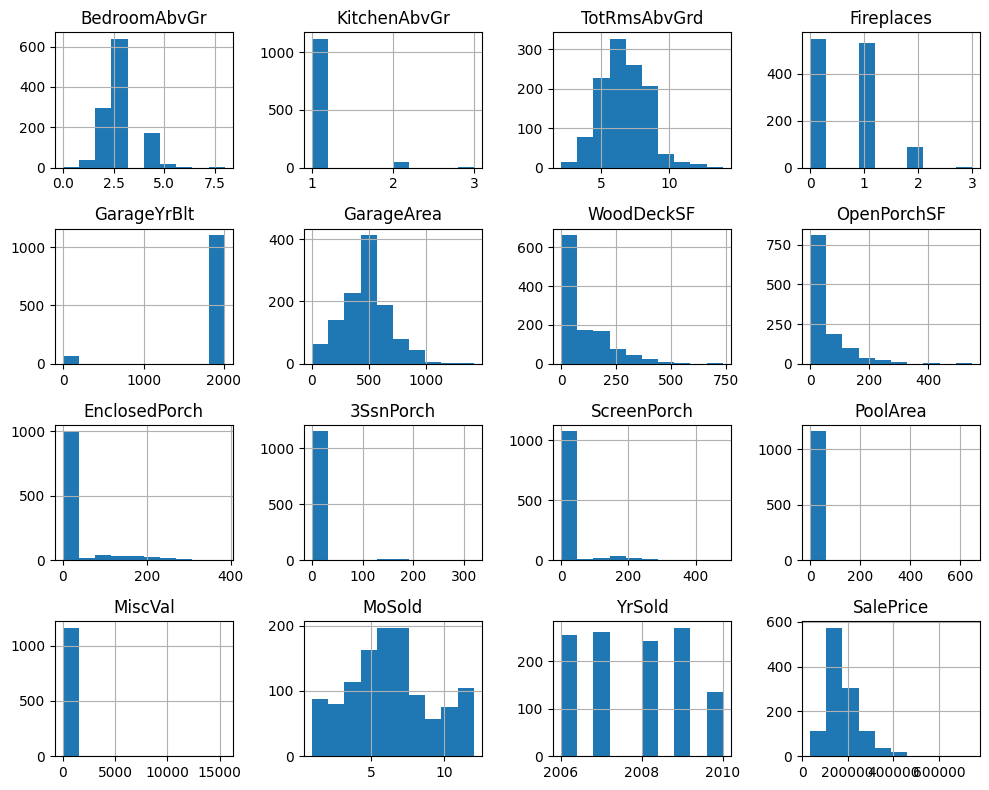

In [10]:
print("\nHistograms of numerical features:")
df_train.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

* GarageArea : gaussienne centrée en 500 sq ft et très peu au dessus de 1000
* ScreenPorch | EnclosedPorch | 3SsnPorch | PoolArea | MiscVal : pic à 0 et presque pas de valeurs au dessus
* OpenPorchSF | WoodDeeckSF : pic à 0 puis une distribution exponentielle
* Mosold : principalement aux mois 05/06/07, un peu moins en Novembre et une distribution uniforme pour le reste
* YrSold : distribution uniforme, un peu moins en 2010 (peut-être moins de données en 2010 à cause de la date de création du dataset)
* Fireplaces : 1 ou aucune pour la grande majorité
* KitchenAbvGr : 1 pour l'écrasante majorité


Box plots to check for outliers:


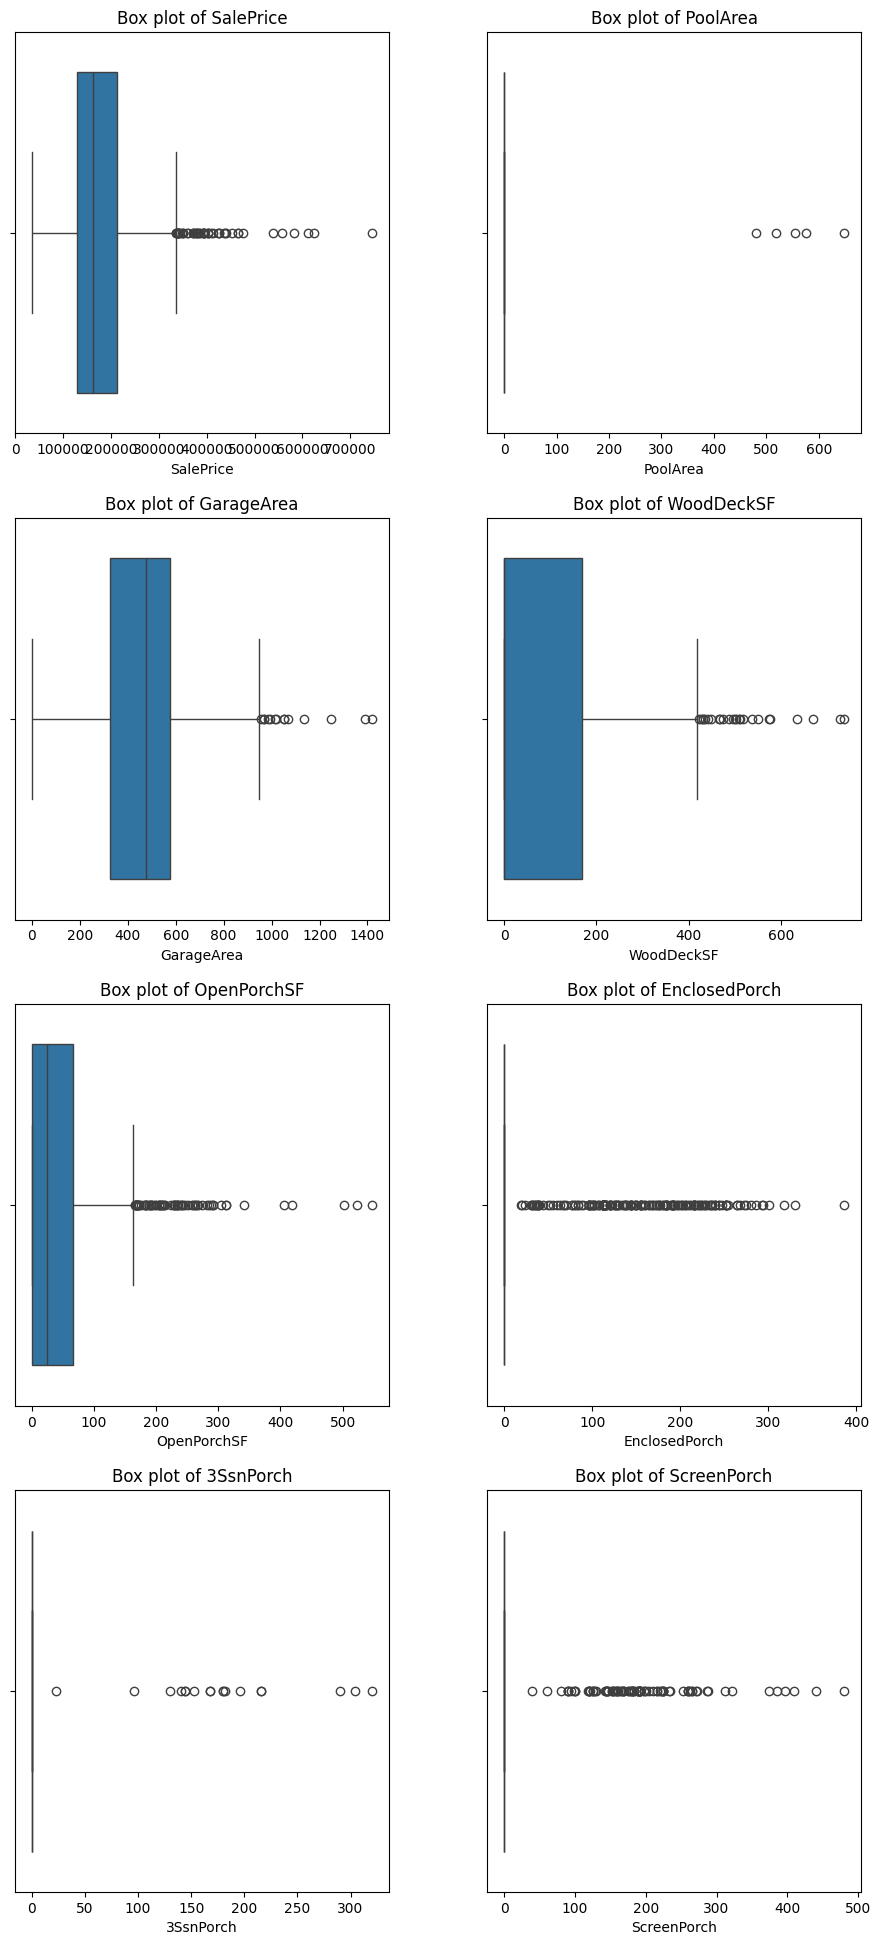

In [11]:
# Box plots for numerical variables to check outliers
print("\nBox plots to check for outliers:")
numeric_cols = ["SalePrice","PoolArea","GarageArea","WoodDeckSF","OpenPorchSF",	"EnclosedPorch","3SsnPorch","ScreenPorch"]

# Set up the plot grid
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df_train[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

* Beaucoup d'outliers sur la plupart des variables
* SalePrice comprends aussi pas mal d'outliers correspondant à des maisons plus chères


Correlation matrix:


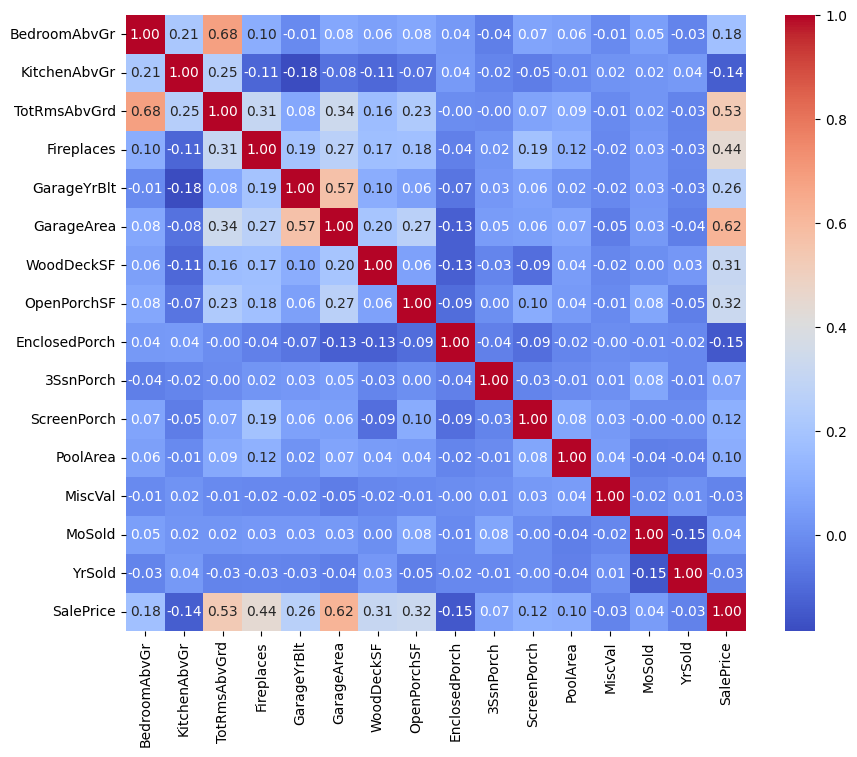

In [12]:
# Correlation matrix
df_train.drop('GarageCars',axis=1,inplace=True)
print("\nCorrelation matrix:")
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

* SalePrice : certaines variables comme YrSold MoSold MiscVal ne semblent pas corrélées au prix de vente  
La surface de garage, le nombre totale de pièces ou le nombre de cheminée sont positivement corrélés avec le prix de vente
* TotRmsAbvGrd est positivement corrélé avec BedroomAbvGrd 


Important correlations with 'SalePrice':


Text(0.5, 1.0, 'Top Negative Correlations')

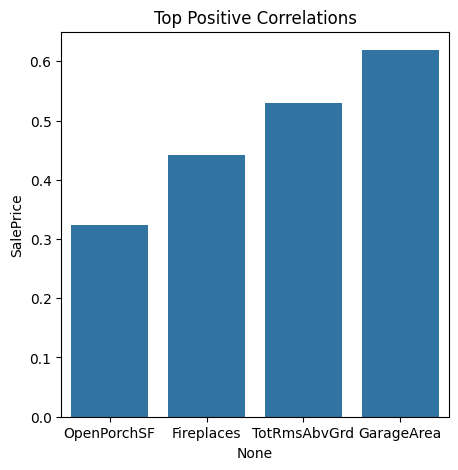

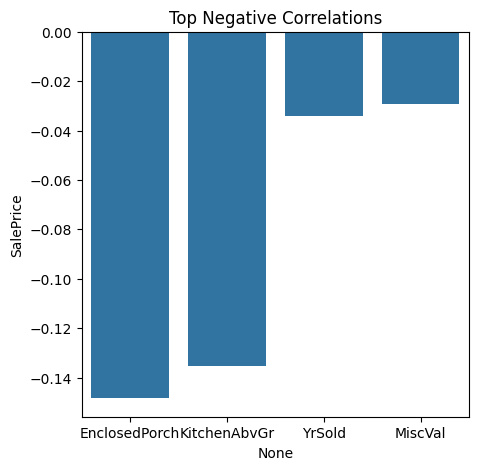

In [14]:
#### Important Correlations with 'SalePrice'
print("\nImportant correlations with 'SalePrice':")
corrs = df_train.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-4:]
corrs_min = corrs[:4]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")


Pairplot of selected features:


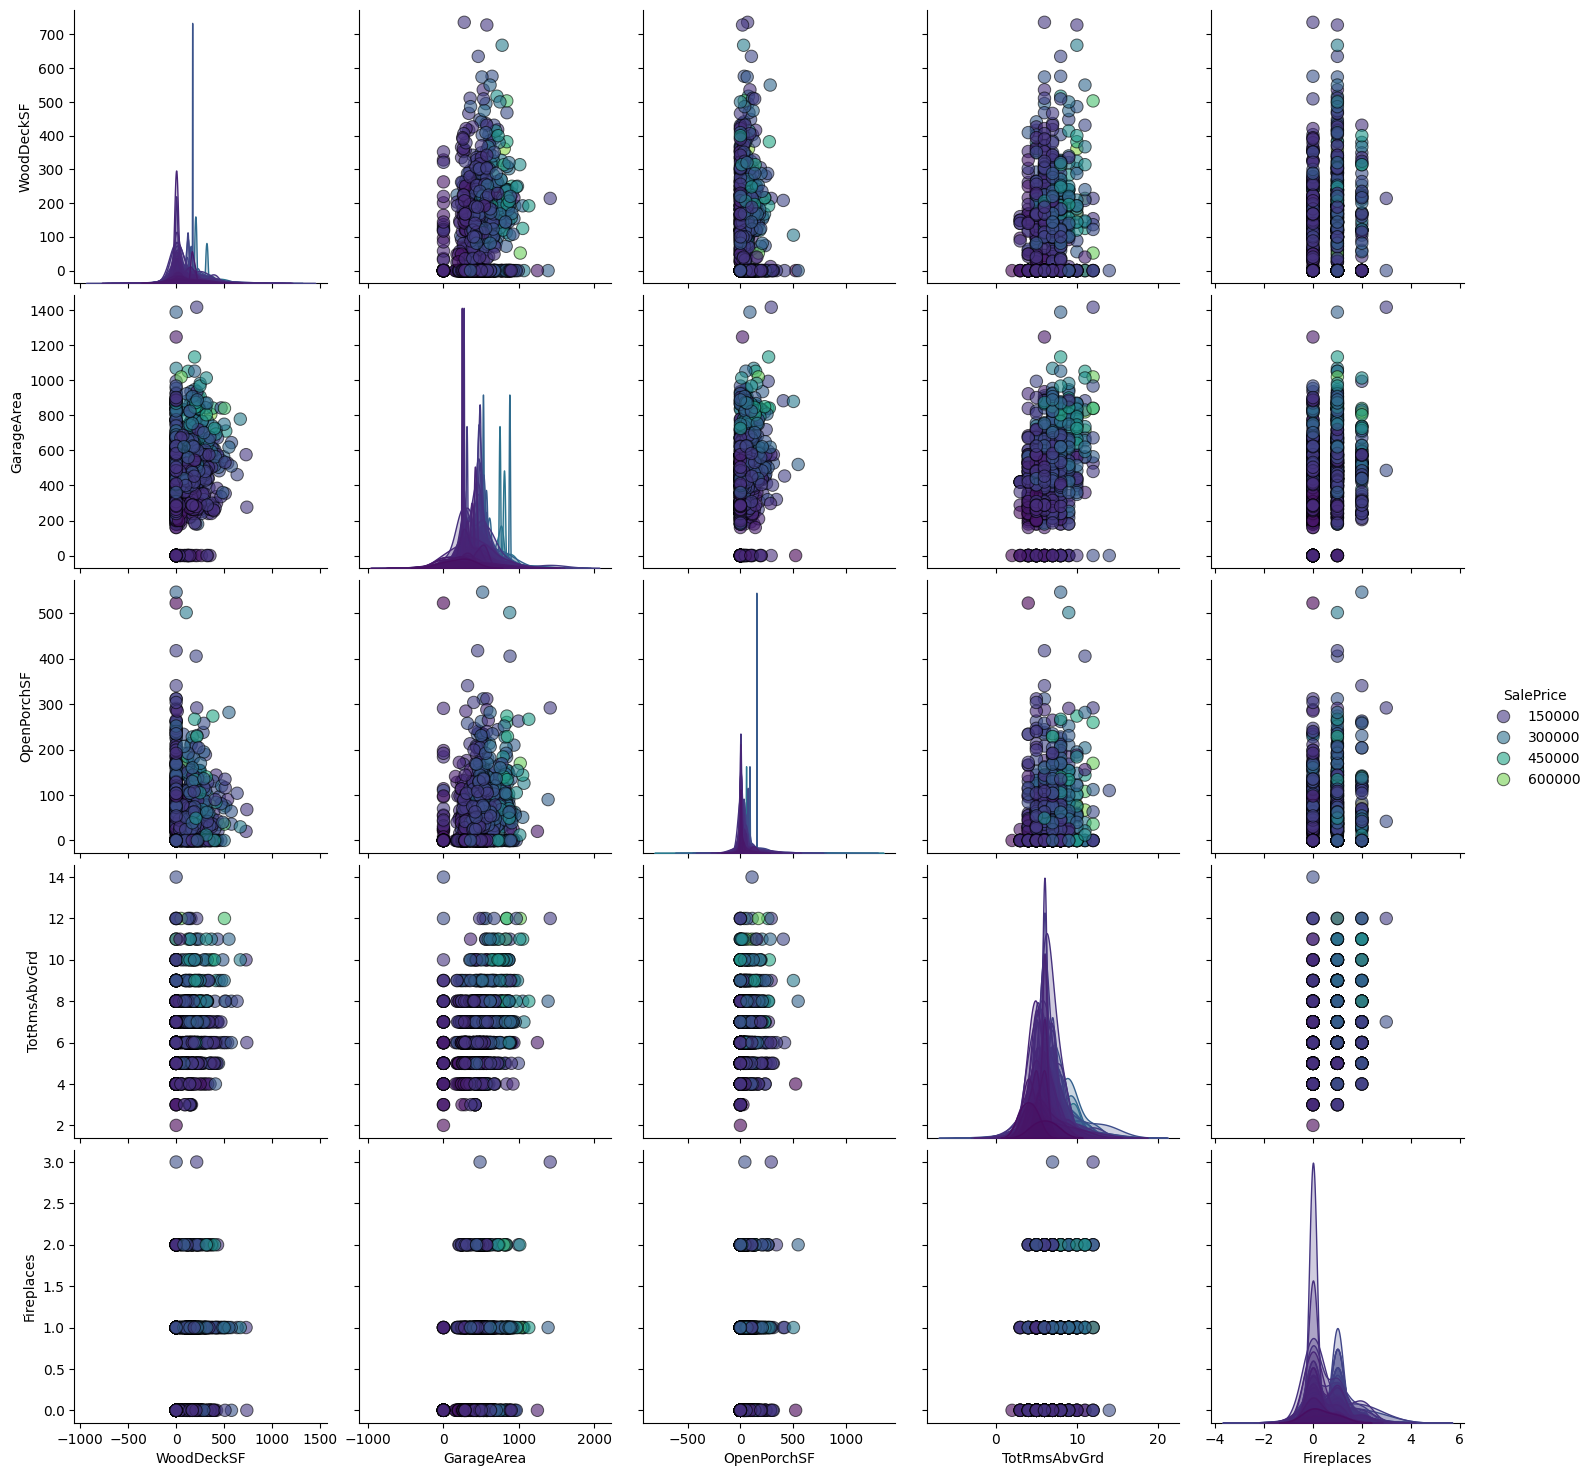

In [24]:
# Pairplot for pairwise relationships in the dataset
print("\nPairplot of selected features:")
selected_features = ["WoodDeckSF","GarageArea","OpenPorchSF","TotRmsAbvGrd","Fireplaces","SalePrice"]

# Creating pairplot
sns.pairplot(df_train[selected_features], hue="SalePrice", palette='viridis', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=3)
plt.show()


* Globalement les distributions plus claires (donc prix de vente plus important) sont à droite des graphiques car ces variables sont corrélées positivement
  

### Comparaison avec les données test

In [26]:

X_test = pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')
X_test.drop("GarageCars", axis=1, inplace=True)
X_test.head()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
id,,,,,,,,,,,,,,,
892,3,1,8,1.0,2006.0,788,0,191,0.0,0,0,0,0,3,2007
1105,3,1,8,2.0,1965.0,513,0,0,0.0,0,0,0,0,6,2009
413,2,1,7,3.0,1955.0,303,476,0,0.0,0,142,0,0,11,2009
522,3,1,7,0.0,1993.0,457,370,70,0.0,238,0,0,0,2,2010
1036,3,1,6,0.0,1999.0,506,0,34,0.0,0,0,0,0,3,2006


In [27]:
X_test.shape

(292, 15)

In [28]:
X_test.isnull().sum()

BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       1
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    1
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

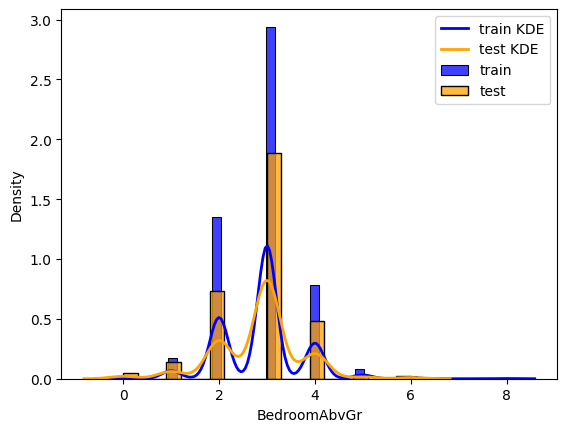

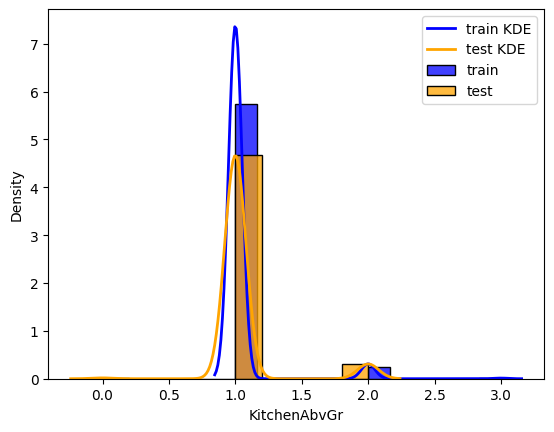

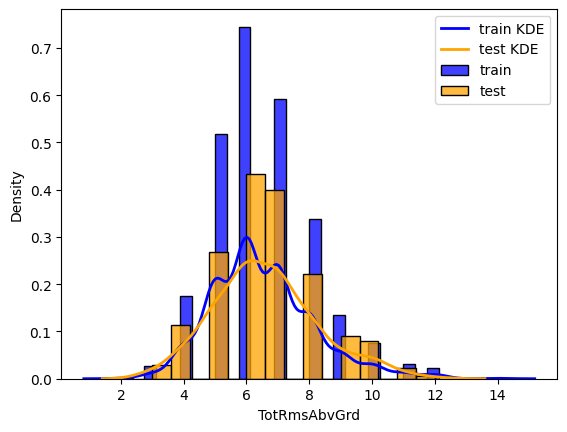

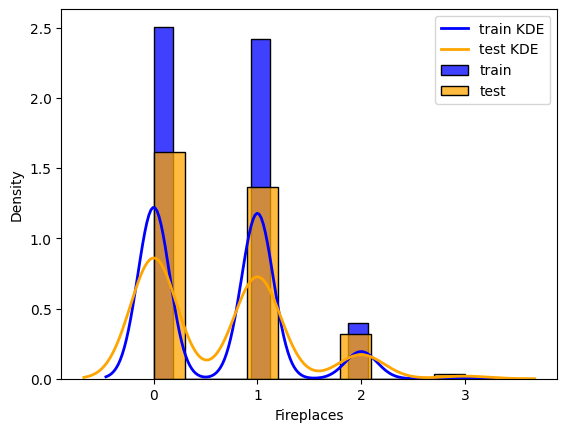

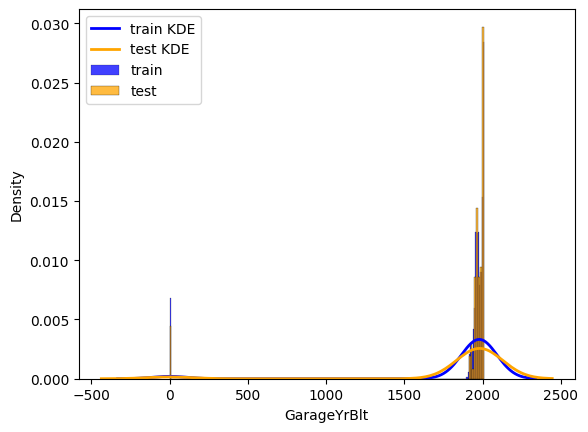

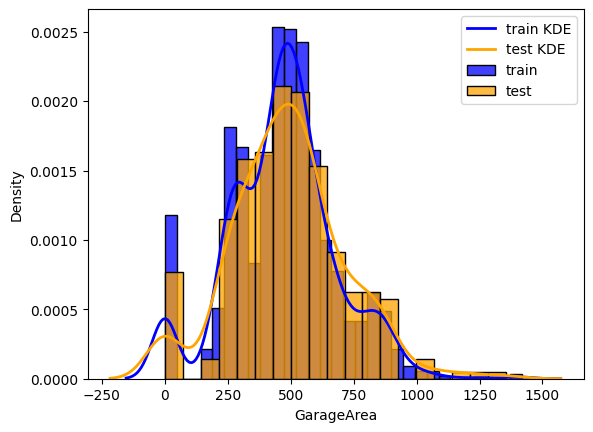

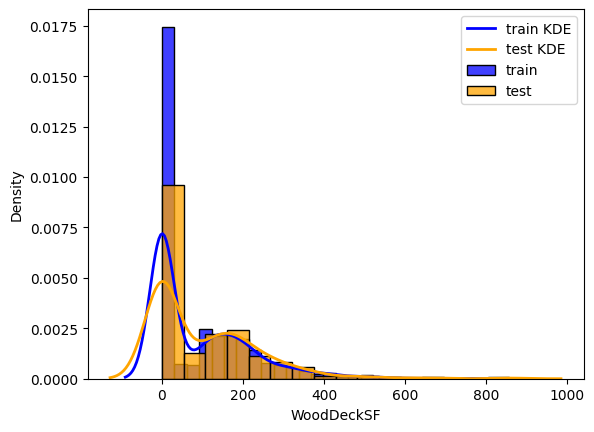

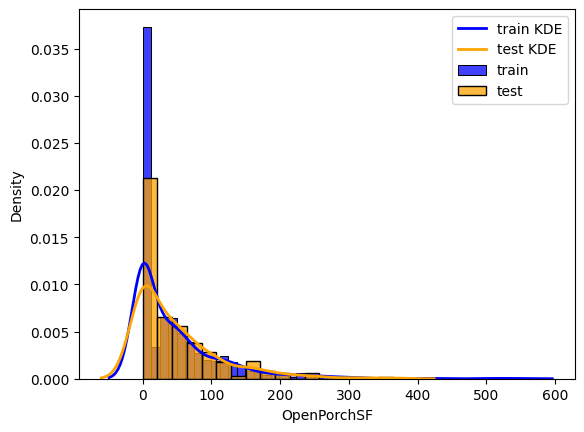

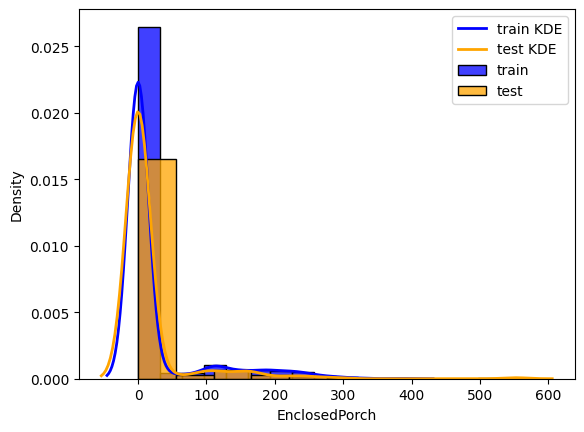

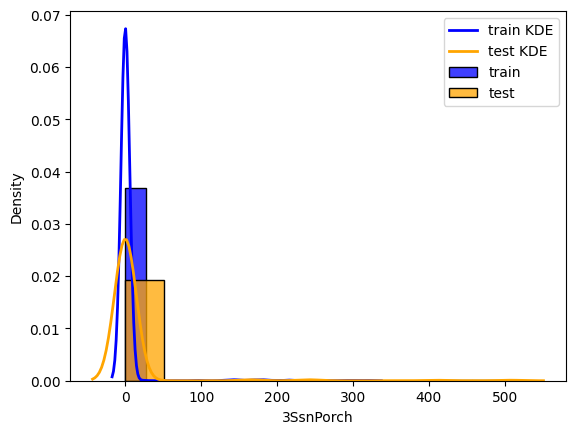

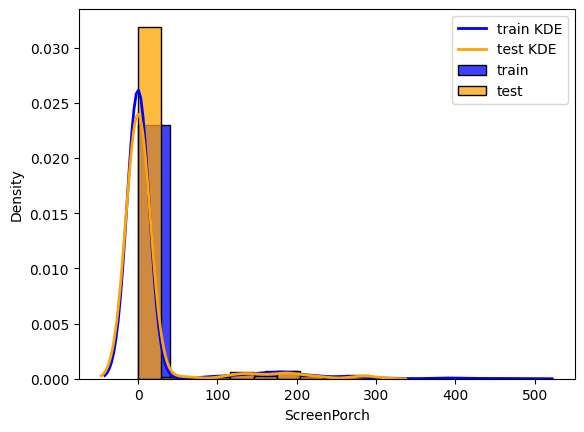

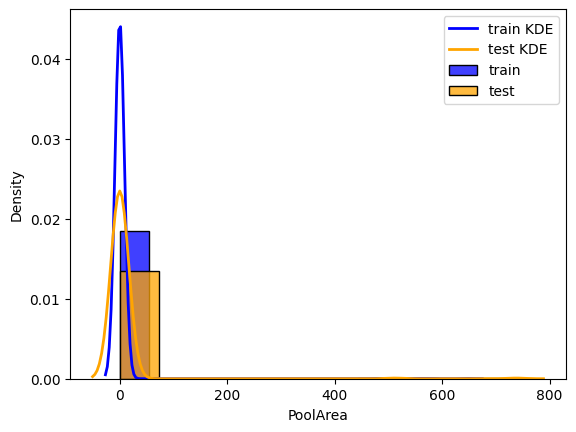

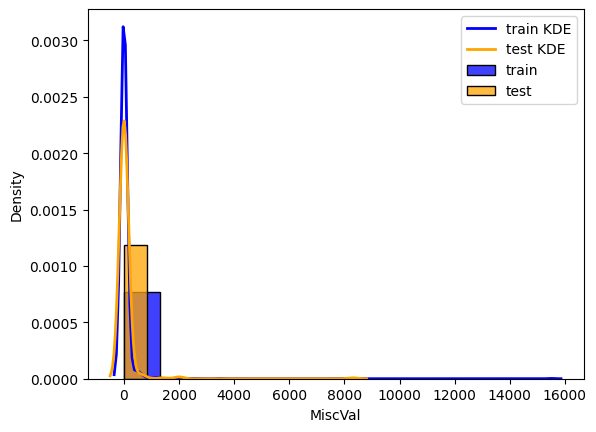

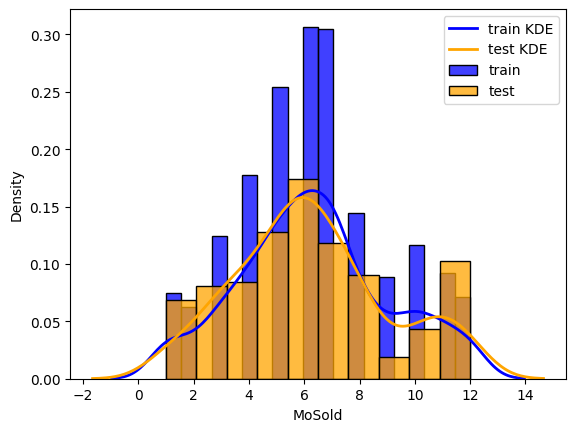

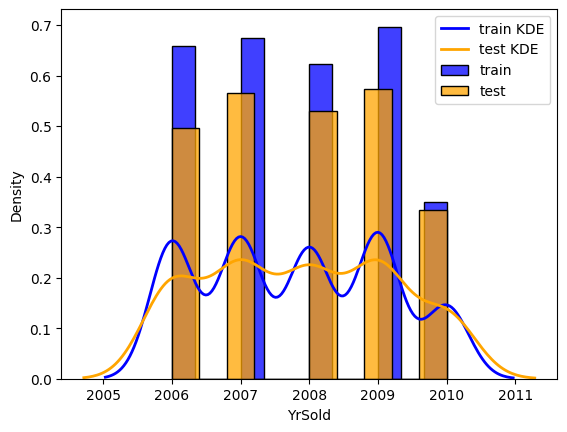

In [30]:
for col in X_test.columns:
    plt.figure()
    
    # Plot histograms for train and test
    sns.histplot(df_train[col], label='train', color='blue', kde=False, stat='density')
    sns.histplot(X_test[col], label='test', color='orange', kde=False, stat='density')
    
    # Overlay KDE plots for train and test
    sns.kdeplot(df_train[col], color='blue', label='train KDE', linewidth=2)
    sns.kdeplot(X_test[col], color='orange', label='test KDE', linewidth=2)
    
    plt.legend()
    plt.show()


* Les distributions sont plutôt similaires entre données d'entraînement et de test